In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from math import pi

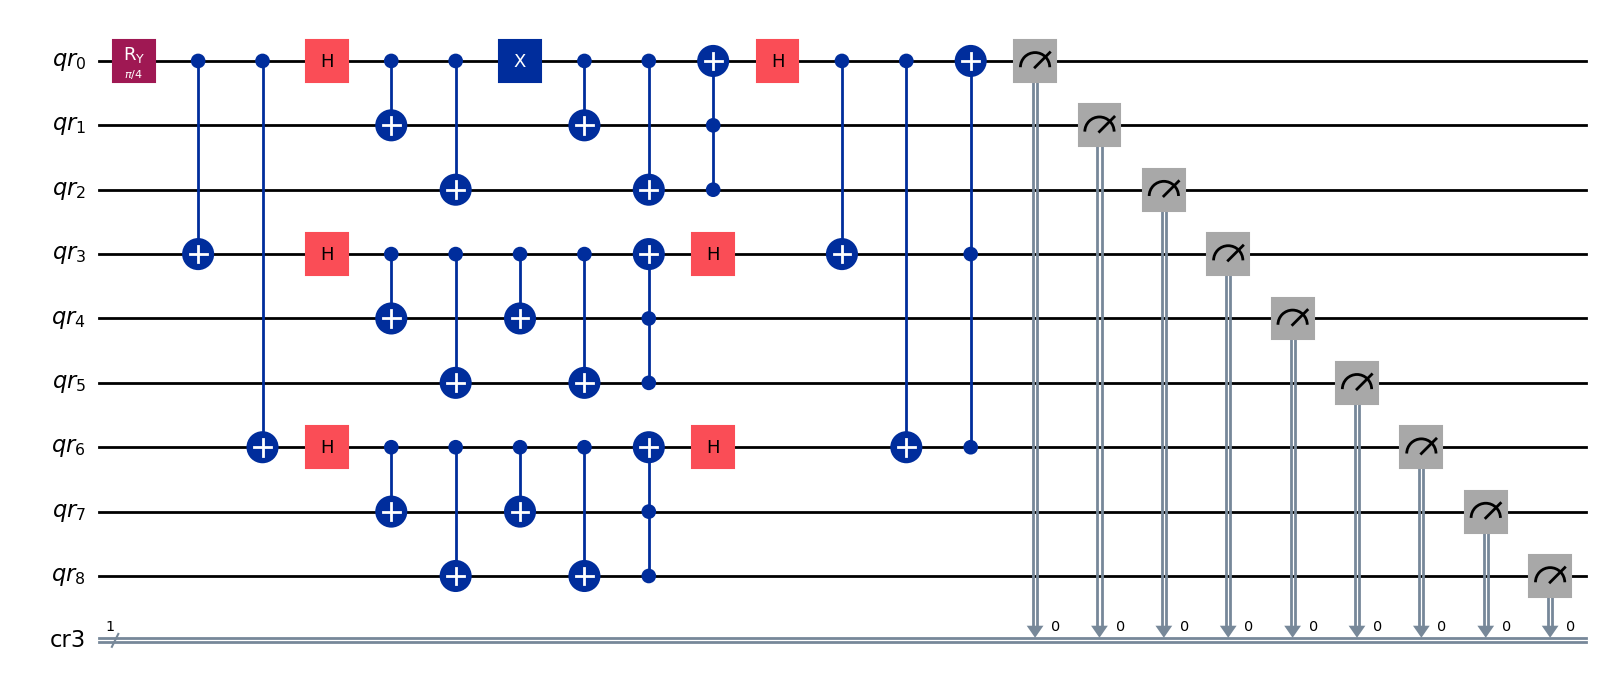

In [12]:
qr=QuantumRegister(9,name="qr")
cr3=ClassicalRegister(1,name="cr3")

qc=QuantumCircuit(qr,cr3)

# initialization
qc.ry(pi/4,0)
qc.cx(0,3)
qc.cx(0,6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(3,4)
qc.cx(3,5)
qc.cx(6,7)
qc.cx(6,8)

# Error
qc.x(0)

qc.cx(0,1)
qc.cx(0,2)
qc.cx(3,4)
qc.cx(3,5)
qc.cx(6,7)
qc.cx(6,8)

qc.mcx([1,2],0)
qc.mcx([5,4],3)
qc.mcx([8,7],6)
qc.h(0)
qc.h(3)
qc.h(6)  
qc.cx(0,3)
qc.cx(0,6)

qc.mcx([3,6],0)

# Final Measurement
qc.measure(0,cr3)
qc.measure(1,cr3)
qc.measure(2,cr3)
qc.measure(3,cr3)
qc.measure(4,cr3)
qc.measure(5,cr3)
qc.measure(6,cr3)
qc.measure(7,cr3)
qc.measure(8,cr3)

qc.draw("mpl")

In [13]:
#qubit-reuse in aersimulator

In [14]:
from qiskit import transpile
from qiskit_aer import AerSimulator

In [15]:
transpiled_qc = transpile(qc, backend=AerSimulator(), init_method="qubit_reuse")

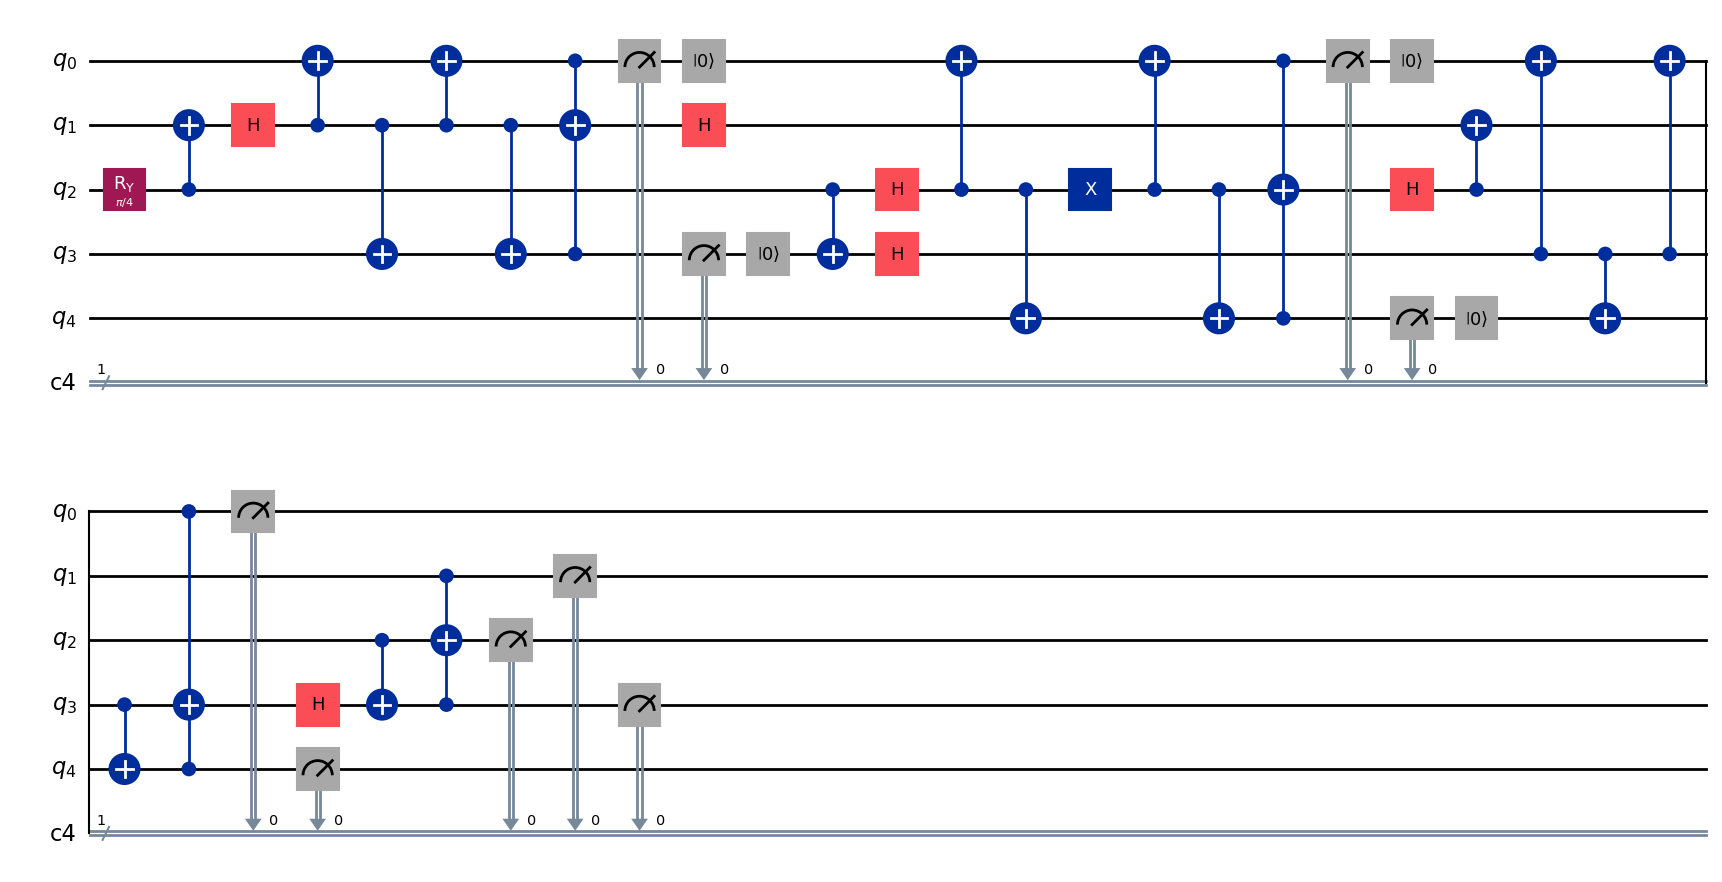

In [16]:
transpiled_qc.draw('mpl')

In [17]:
#qubit-reuse in generic backend

In [18]:
from qiskit.providers.fake_provider import GenericBackendV2

In [19]:
transpiled_qc1 = transpile(qc, backend=GenericBackendV2(num_qubits=9), init_method="qubit_reuse")

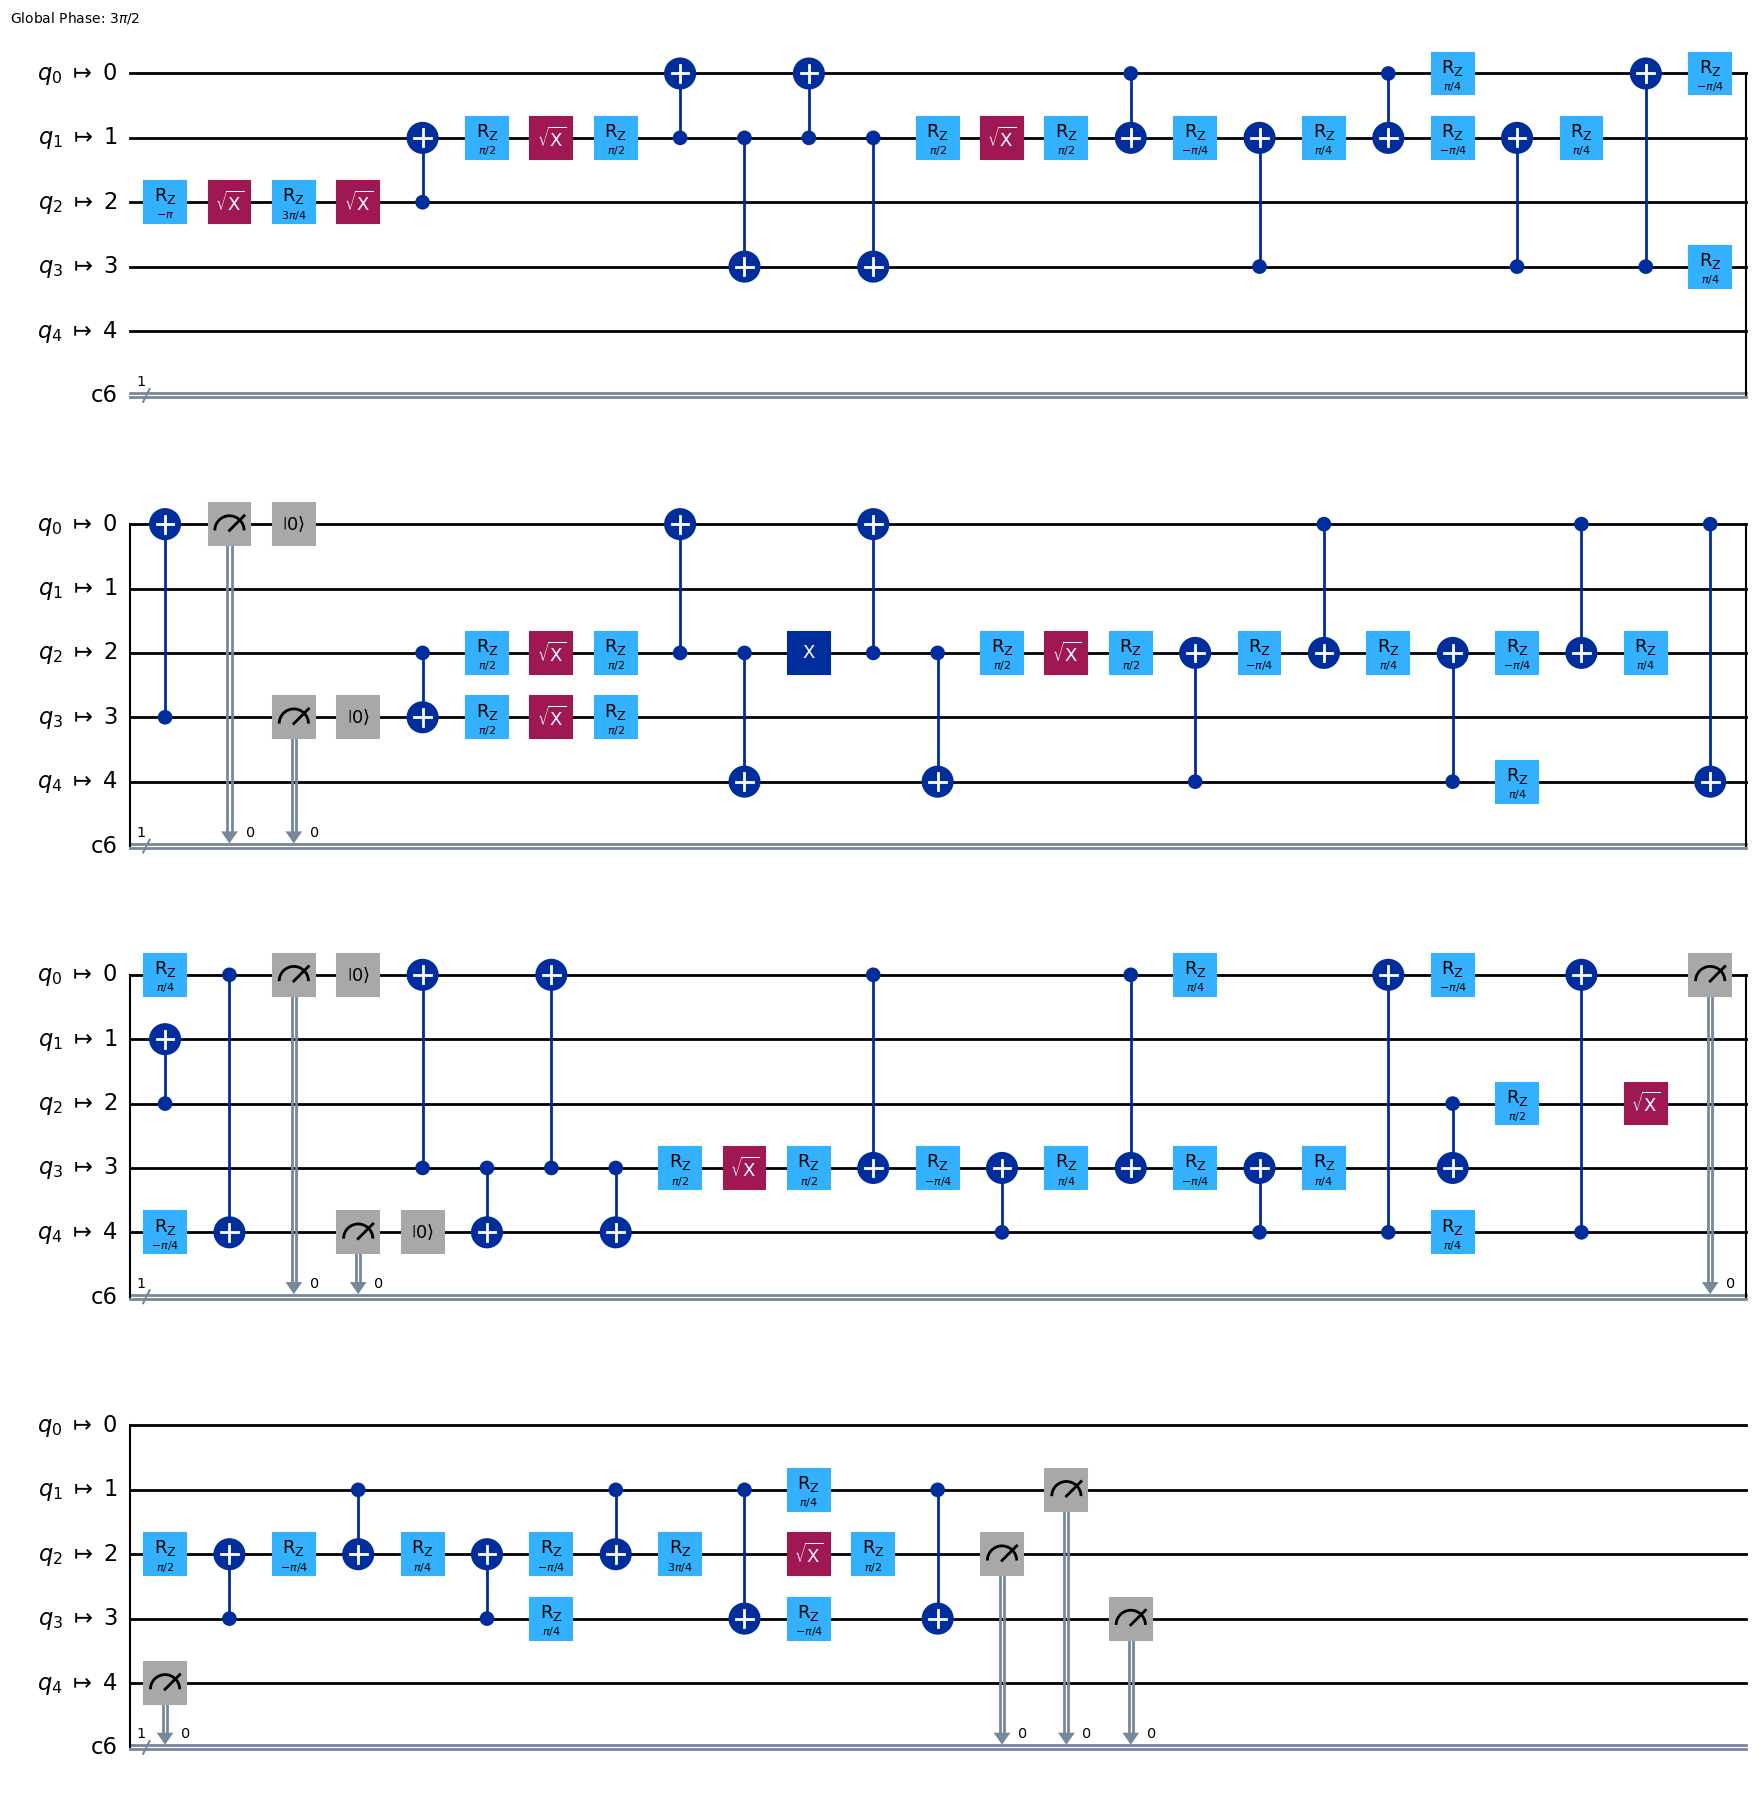

In [20]:
transpiled_qc1.draw('mpl', idle_wires=False)

In [21]:
#qubit-reuse in actual hardware(IBM sherbrooke)

In [22]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import transpile

backend_name = "ibm_sherbrooke"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)

transpiled_qc2= transpile(qc, backend, init_method="qubit_reuse")

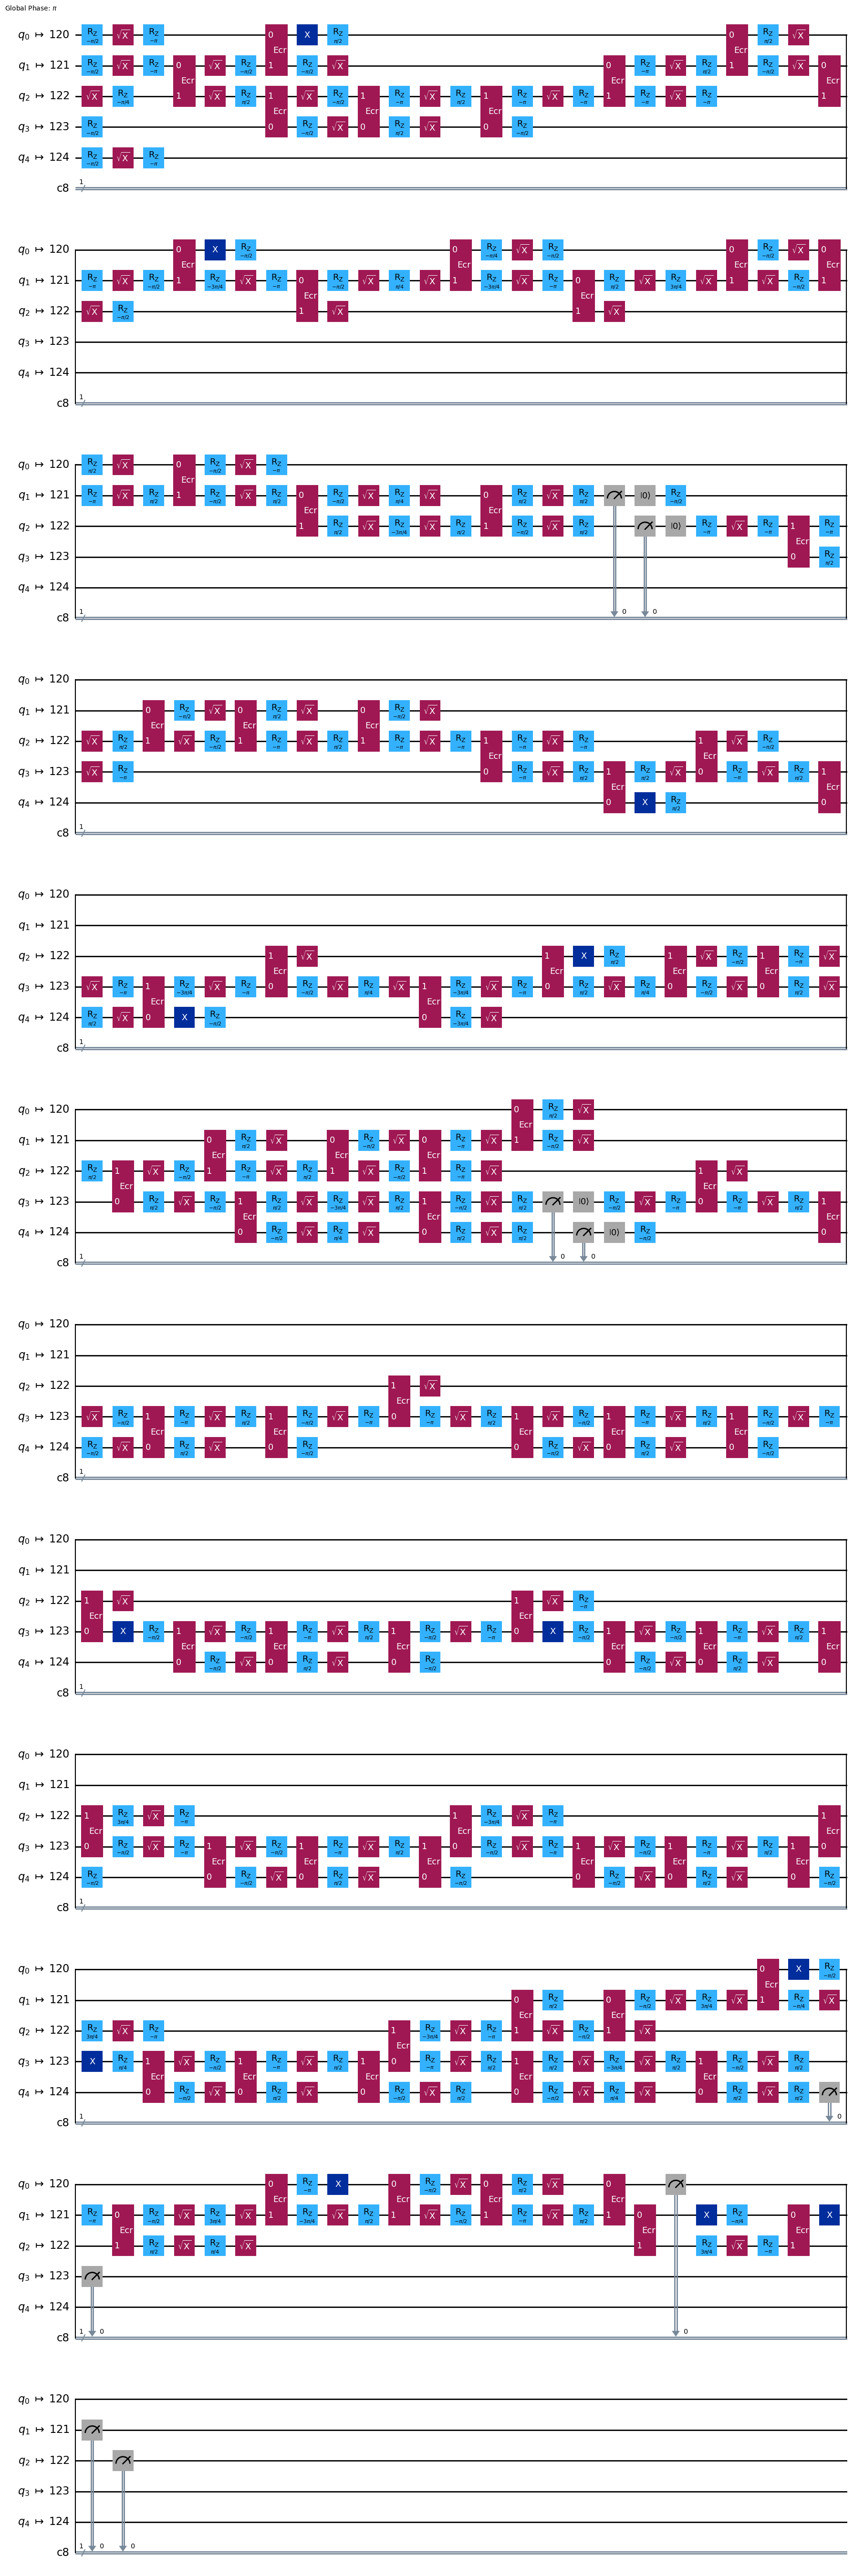

In [23]:
transpiled_qc2.draw('mpl', idle_wires=False)